# Importing Libraries 

In [65]:
import pandas as pd
import numpy as np
import sqlalchemy
import datetime
import sql_functions as sf
import dotenv
import psycopg2


In [66]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

# 1. Reading Data from CSV files with correct encoding type 

In [67]:
sales_before_df=pd.read_csv('Data/my_sales_before_14010624.csv' , encoding='utf_16_le')
sales_after_df=pd.read_csv('Data/my_sales_after_14010624.csv' , encoding='utf_16_le')
product_df=pd.read_excel('Data/dim_products.xls')

WARNING *** file size (59656) not 512 + multiple of sector size (512)


In [68]:
sales_before_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692042 entries, 0 to 1692041
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   TRANSACTION_ID    int64 
 1   TRANSACTION_DATE  object
 2   CUSOMER_ID        int64 
 3   PRODUCT_TYPE      int64 
 4   PRODUCTID         int64 
 5   CNT               int64 
 6   APPNAME           object
dtypes: int64(5), object(2)
memory usage: 90.4+ MB


In [69]:
sales_after_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153797 entries, 0 to 1153796
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   TRANSACTION_ID    1153797 non-null  int64 
 1   TRANSACTION_DATE  1153797 non-null  object
 2   CUSOMER_ID        1153797 non-null  int64 
 3   PRODUCT_TYPE      1153797 non-null  int64 
 4   PRODUCTID         1153797 non-null  int64 
 5   CNT               1153797 non-null  int64 
 6   APPNAME           1153797 non-null  object
dtypes: int64(5), object(2)
memory usage: 61.6+ MB


In [70]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TYPE         263 non-null    int64  
 1   PRODUCTID    263 non-null    int64  
 2   DESCRIPTION  263 non-null    object 
 3   PRICE        263 non-null    int64  
 4   DURATION     263 non-null    int64  
 5   VOLUME       263 non-null    float64
 6   TARIFFCODE   263 non-null    object 
 7   TYPENAME     263 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.6+ KB


# 2. Cleaning and preparing the Data 
    - lowercase column names
    - Data types changing if necessary 
    - looking for null values 
    

In [71]:
# Converting all column names to lower case
sales_before_df.columns=[col.lower() for col in sales_before_df.columns]
sales_after_df.columns=[col.lower() for col in sales_after_df.columns]
product_df.columns=[col.lower() for col in product_df.columns]

In [72]:
sales_after_df.dtypes

transaction_id       int64
transaction_date    object
cusomer_id           int64
product_type         int64
productid            int64
cnt                  int64
appname             object
dtype: object

In [73]:
# Converting transaction_date column from string to datetime
sales_before_df['transaction_date_formatted'] = pd.to_datetime(sales_before_df['transaction_date'], format='%m/%d/%Y %I:%M:%S %p' , errors='coerce')
sales_after_df['transaction_date_formatted'] = pd.to_datetime(sales_after_df['transaction_date'], format='%m/%d/%Y %I:%M:%S %p' , errors='coerce')



In [74]:
#dropping the old date columns
sales_before_df.drop('transaction_date' , axis=1 , inplace=True)
sales_after_df.drop('transaction_date' ,axis=1,  inplace=True)

In [75]:
print(sales_before_df.head(5))
print(sales_after_df.head(5))

   transaction_id  cusomer_id  product_type  productid  cnt appname  \
0      1063609024      190959             1        779    1     Web   
1      1064338610      190959             1        779    1  Mobile   
2      1065032817      190959             1        780    1     Web   
3      1065775681      190959             1        780    1  Mobile   
4      1063648132      190962             2         87    1  Mobile   

  transaction_date_formatted  
0        2022-05-31 15:50:54  
1        2022-07-02 11:00:52  
2        2022-08-01 13:04:24  
3        2022-09-02 16:26:38  
4        2022-06-02 12:47:48  
   transaction_id  cusomer_id  product_type  productid  cnt appname  \
0      1066492863      190959             1        933    1  Mobile   
1      1067065226      190959             1        933    1  Mobile   
2      1066498962      190961             1        932    1     Web   
3      1067188219      190961             1        932    1     Web   
4      1066231924      190962   

In [76]:
product_df.drop('description', axis=1, inplace=True)


In [77]:
product_df.head(4)

,type,productid,price,duration,volume,tariffcode,typename
0,2,88,15000,0,5.00,PRESTR05,ExtraGig
1,2,10,9000,0,3.00,PRESTH03,ExtraGig
2,2,77,6000,0,3.00,ExtraGig77,ExtraGig
3,2,3,9000,0,3.00,PRESTR03,ExtraGig


In [78]:
sales_after_df.rename(columns={'transaction_date_formatted': 'transaction_date'} , inplace=True)
sales_after_df

,transaction_id,cusomer_id,product_type,productid,cnt,appname,transaction_date
0,1066492863,190959,1,933,1,Mobile,2022-10-02 10:29:18
1,1067065226,190959,1,933,1,Mobile,2022-11-02 14:53:23
2,1066498962,190961,1,932,1,Web,2022-10-02 16:29:29
3,1067188219,190961,1,932,1,Web,2022-11-08 21:33:35
4,1066231924,190962,2,87,2,Mobile,2022-09-21 21:39:35
...,...,...,...,...,...,...,...
1153792,1066561552,699959,2,87,1,Mobile,2022-10-05 21:44:44
1153793,1066664884,699959,1,936,1,Mobile,2022-10-11 14:25:22
1153794,1067222806,699959,1,516,1,Mobile,2022-11-10 14:58:11
1153795,1066884679,699960,1,960,1,Web,2022-10-23 02:21:25


In [79]:
sales_before_df.rename(columns={'transaction_date_formatted': 'transaction_date'} , inplace=True)
sales_before_df

,transaction_id,cusomer_id,product_type,productid,cnt,appname,transaction_date
0,1063609024,190959,1,779,1,Web,2022-05-31 15:50:54
1,1064338610,190959,1,779,1,Mobile,2022-07-02 11:00:52
2,1065032817,190959,1,780,1,Web,2022-08-01 13:04:24
3,1065775681,190959,1,780,1,Mobile,2022-09-02 16:26:38
4,1063648132,190962,2,87,1,Mobile,2022-06-02 12:47:48
...,...,...,...,...,...,...,...
1692037,1064532375,375919,1,782,1,Mobile,2022-07-09 19:36:42
1692038,1063790745,375921,1,780,1,Mobile,2022-06-09 08:04:51
1692039,1064176352,375921,1,782,1,Mobile,2022-06-26 10:06:06
1692040,1064804419,375921,1,782,1,Mobile,2022-07-22 09:29:28


In [80]:
# looking for null values
sales_before_df.isnull().value_counts()


transaction_id  cusomer_id  product_type  productid  cnt    appname  transaction_date
False           False       False         False      False  False    False               1692013
                                                                     True                     29
dtype: int64

In [81]:
# Dropping null values
sales_before_df.dropna(inplace=True)

In [82]:
# looking for null values
sales_after_df.isnull().value_counts()

transaction_id  cusomer_id  product_type  productid  cnt    appname  transaction_date
False           False       False         False      False  False    False               1153779
                                                                     True                     18
dtype: int64

In [83]:
# looking for null values
sales_after_df.dropna(inplace=True)

In [84]:
product_df.isnull().value_counts()

type   productid  price  duration  volume  tariffcode  typename
False  False      False  False     False   False       False       263
dtype: int64

# 3. Importing Data to SQL DB

In [ ]:
engine = sf.get_engine()
schema = 'capstone'
table_name = 'dim_product'

In [ ]:
# Importing product_df to SQL database as dim_product
if engine!=None:
    try:
        product_df.to_sql(table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # your class schema
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

# 4. Union sales DF and join 

In [86]:
# Union the two sets of sales before and after the price change action 
sales_df = pd.concat([sales_before_df, sales_after_df])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845792 entries, 0 to 1153796
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int64         
 1   cusomer_id        int64         
 2   product_type      int64         
 3   productid         int64         
 4   cnt               int64         
 5   appname           object        
 6   transaction_date  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 173.7+ MB


In [87]:
# joining sales_df with product df to get all need variables in one DF
sales_prod_df = sales_df.merge(product_df, on="productid")
sales_prod_df.head()

,transaction_id,cusomer_id,product_type,productid,cnt,appname,transaction_date,type,price,duration,volume,tariffcode,typename
0,1063609024,190959,1,779,1,Web,2022-05-31 15:50:54,1,44000,30,15.00,T1103,RatePlan
1,1064338610,190959,1,779,1,Mobile,2022-07-02 11:00:52,1,44000,30,15.00,T1103,RatePlan
2,1064038478,190965,1,779,1,Mobile,2022-06-20 01:36:02,1,44000,30,15.00,T1103,RatePlan
3,1064723985,190975,1,779,1,Web,2022-07-18 17:03:59,1,44000,30,15.00,T1103,RatePlan
4,1065582042,190975,1,779,1,Web,2022-08-25 10:01:35,1,44000,30,15.00,T1103,RatePlan


In [88]:
sales_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845792 entries, 0 to 2845791
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int64         
 1   cusomer_id        int64         
 2   product_type      int64         
 3   productid         int64         
 4   cnt               int64         
 5   appname           object        
 6   transaction_date  datetime64[ns]
 7   type              int64         
 8   price             int64         
 9   duration          int64         
 10  volume            float64       
 11  tariffcode        object        
 12  typename          object        
dtypes: datetime64[ns](1), float64(1), int64(8), object(3)
memory usage: 304.0+ MB


In [89]:
sales_prod_df.describe().round(2)

,transaction_id,cusomer_id,product_type,productid,cnt,type,price,duration,volume
count,2845792.00,2845792.00,2845792.00,2845792.00,2845792.00,2845792.00,2845792.00,2845792.00,2845792.00
mean,1065672756.28,445892.73,1.68,492.66,1.19,1.68,87152.81,30.60,53.27
std,1182779.68,288414.01,0.78,367.59,1.11,0.78,143928.99,58.04,103.84
min,1063597851.00,1.00,1.00,3.00,1.00,1.00,0.00,0.00,0.50
25%,1064675036.75,198290.00,1.00,89.00,1.00,1.00,13000.00,0.00,6.00
50%,1065687312.50,394111.00,1.00,764.00,1.00,1.00,30000.00,30.00,10.00
75%,1066699695.25,675510.00,2.00,784.00,1.00,2.00,89000.00,30.00,50.00
max,1067722094.00,1032851.00,3.00,961.00,20.00,3.00,2699000.00,1825.00,2000.00


In [90]:
# converting price currency to euro
sales_prod_df['price'] = sales_prod_df['price']/5000

In [91]:
# Creating new column for total price
sales_prod_df["total_price"] = sales_prod_df['cnt'] * sales_prod_df['price']

In [92]:
sales_prod_df.head()

,transaction_id,cusomer_id,product_type,productid,cnt,appname,transaction_date,type,price,duration,volume,tariffcode,typename,total_price
0,1063609024,190959,1,779,1,Web,2022-05-31 15:50:54,1,8.80,30,15.00,T1103,RatePlan,8.80
1,1064338610,190959,1,779,1,Mobile,2022-07-02 11:00:52,1,8.80,30,15.00,T1103,RatePlan,8.80
2,1064038478,190965,1,779,1,Mobile,2022-06-20 01:36:02,1,8.80,30,15.00,T1103,RatePlan,8.80
3,1064723985,190975,1,779,1,Web,2022-07-18 17:03:59,1,8.80,30,15.00,T1103,RatePlan,8.80
4,1065582042,190975,1,779,1,Web,2022-08-25 10:01:35,1,8.80,30,15.00,T1103,RatePlan,8.80


# 5. Analysis 

In [93]:
# How many customers ?
sales_prod_df['cusomer_id'].nunique()

396013

In [94]:
# How many transaction ?
sales_prod_df['transaction_id'].count() 

2845792

In [95]:
# AVG number of transaction per month // to 

<Axes: ylabel='Frequency'>

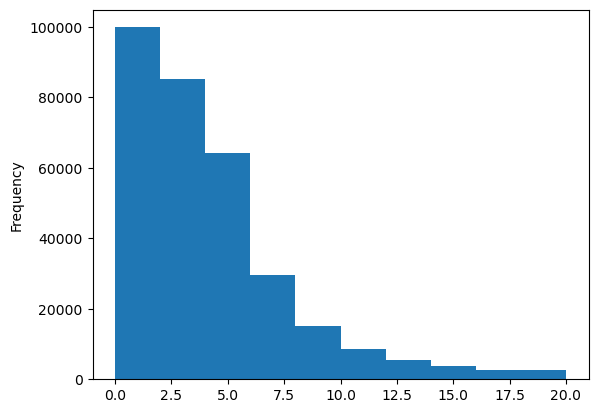

In [96]:
sales_before_df.groupby('cusomer_id')['transaction_id'].count().plot(kind='hist', range=[0,20])

In [97]:
sales_before_df.groupby('cusomer_id')['transaction_id'].count().mean()

5.16010222535323

In [98]:
customer_df = sales_before_df.groupby('cusomer_id')['transaction_id'].count().reset_index()
customer_df

,cusomer_id,transaction_id
0,1,2
1,9,1
2,10,2
3,17,16
4,29,1
...,...,...
327898,992670,2
327899,992676,1
327900,992678,1
327901,992679,1


In [99]:
sales_prod_df.groupby(['typename','duration','volume']).agg({'total_price':'sum' , 'transaction_id':'count'}).sort_values('total_price', ascending=False).head(10)

total_price  transaction_id
typename duration volume                             
RatePlan 30       100.00   7731854.88          280042
ExtraGig 0        10.00    6053614.60          464248
RatePlan 30       50.00    5588558.50          325179
         90       150.00   4047025.50           84761
                  160.00   2255723.20           44404
         365      620.00   2191723.60           12327
         30       40.00    1795284.20          121636
         180      480.00   1767707.42           13563
                  320.00   1620056.40           17648
         30       180.00   1553074.40           33347

In [100]:
sales_prod_df.groupby(['typename']).agg({'cnt':'sum','total_price':'sum'})#.plot(kind='pie')

,cnt,total_price
typename,,
ExtraGig,1354889,6770352.42
GigPack,568151,1029763.70
RatePlan,1469755,45077737.40


In [101]:
sales_prod_df.groupby(['duration']).agg({'cnt':'sum','total_price':'sum'})#.plot(kind='pie')

,cnt,total_price
duration,,
0,1354889,6770352.42
1,568153,1029763.70
2,8,0.00
3,14,0.00
5,12,0.00
7,17,0.00
10,28,0.00
15,30,0.00
20,26,0.00


# RFM Analysis 

In [102]:
import datetime as dt 

In [103]:
sales_prod_df['transaction_date'].max()

Timestamp('2022-12-01 23:59:35')

In [104]:
# reference date for recency
ref_date = sales_prod_df['transaction_date'].max()

In [105]:
rfm = sales_prod_df.groupby('cusomer_id', as_index=False).agg({'transaction_date': lambda date:(ref_date - date.max()).days,
                                               'transaction_id': lambda num: num.nunique(),
                                               'total_price': lambda total_price: total_price.sum()})

In [106]:
rfm

,cusomer_id,transaction_date,transaction_id,total_price
0,1,24,3,132.40
1,6,71,1,35.60
2,9,142,1,59.80
3,10,119,2,22.40
4,17,10,19,601.80
...,...,...,...,...
396008,1032838,0,1,11.60
396009,1032841,0,1,63.40
396010,1032845,0,1,48.00
396011,1032848,0,1,35.60


In [107]:
rfm.columns = ['customer_id','recency','frequency','monetary']
rfm

,customer_id,recency,frequency,monetary
0,1,24,3,132.40
1,6,71,1,35.60
2,9,142,1,59.80
3,10,119,2,22.40
4,17,10,19,601.80
...,...,...,...,...
396008,1032838,0,1,11.60
396009,1032841,0,1,63.40
396010,1032845,0,1,48.00
396011,1032848,0,1,35.60


In [108]:
rfm.describe()

,customer_id,recency,frequency,monetary
count,396013.00,396013.00,396013.00,396013.00
mean,500731.76,45.40,7.19,133.53
std,305601.15,46.81,14.19,103.62
min,1.00,0.00,1.00,0.00
25%,226412.00,9.00,1.00,59.80
50%,482986.00,25.00,4.00,108.40
75%,728046.00,71.00,8.00,182.00
max,1032851.00,184.00,625.00,2464.00


In [109]:
rfm['recency_score']= pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])

In [110]:
rfm['frequency_score']=pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1,2,3,4,5])

In [111]:
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1,2,3,4,5])

In [112]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,1,24,3,132.40,3,2,3
1,6,71,1,35.60,2,1,1
2,9,142,1,59.80,1,1,2
3,10,119,2,22.40,1,2,1
4,17,10,19,601.80,4,5,5


In [113]:
# creating rfm_score that shows score of recency, frequency and monetary
rfm["rfm_score"] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)

In [114]:
rfm.shape

(396013, 8)

In [115]:
rfm['rfm_score'].nunique()

125

In [ ]:
# segmenting customers using rfm_score 

seg_map = { r'555':'Champions',
            r'554':'Loyal Customers',
            r'':'',
            r'':'',
            r'':'',
            r'':'',
            r'':'',
            r'':'',
            r'':'',
            r'':'',}

rfm['segment'] = rfm['rfm_score'].replace(seg_map ,regex=True)

# 6 - Recreating RFM Analysis after meeting Marketing Manager 
    - Recency is not a  time passed from the last transaction date but it is a time passed from expiration of  the last (Rate Plan) transaction.
    - Frequency is the number of Rate Plan transactions not all transactions
    - ARPU is Monthly AVERAGE Revenue of each customer for active month
    - ACPU is Monthly Average Gig used by each Customer


In [134]:
# Calculating 
# # sum of gig used 'volume' per customer  
# - No. of days starting from first transaction and last one (Taking into consideration the duration of last transaction). 
# - Total revenue per customer 
customer_tab = sales_prod_df.groupby('cusomer_id', as_index=False).agg({'volume' : 'sum', 
                                                'transaction_date': lambda date:(date.max() + pd.Timedelta(days=sales_prod_df.loc[date.idxmax(), 'duration']) - date.min()).days,
                                                'total_price' : 'sum'
                                                }) 

In [135]:
# Renaming customer_tab columns
customer_tab.columns=['customer_id','sum_of_volume', 'difference_days', 'total_revenue']

In [136]:
# Calculating ACPU 
customer_tab['avg_cons_per_user'] = customer_tab['sum_of_volume']/(customer_tab['difference_days']/30) 
# Calculating ARPU
customer_tab['avg_revenue_per_user'] = customer_tab['total_revenue']/(customer_tab['difference_days']/30) 

In [146]:
# Grouping by 'customer_id' and calculating the frequency of 'RatePlan' in 'typename'
customer_frequency = sales_prod_df[sales_prod_df['typename'] == 'RatePlan'].groupby('cusomer_id').size().reset_index(name='frequency')

# Merging the frequency data with customer_tab DataFrame
customer_tab = customer_tab.merge(customer_frequency, left_on='customer_id', right_on='cusomer_id', how='left')


In [148]:
ref_date

Timestamp('2022-12-01 23:59:35')

In [151]:
# Grouping by cusomer_id and calculating recency as how much days from the expire date of the last transaction
customer_recency = sales_prod_df.groupby('cusomer_id', as_index=False).agg({'transaction_date': lambda date:(ref_date - (date.max()+ pd.Timedelta(days=sales_prod_df.loc[date.idxmax(), 'duration']))).days})
# renaming columns
customer_recency.columns = ['customer_id', 'recency'] 
# Merging the recency data with customer_tab df 
customer_tab = customer_tab.merge(customer_recency, on='customer_id', how = 'left')

In [153]:
customer_tab.tail(5)

,customer_id,sum_of_volume,difference_days,total_revenue,avg_cons_per_user,avg_revenue_per_user,recency_x,frequency_x,cusomer_id,frequency_y,recency_y
396008,1032838,25.00,30,11.60,25.00,11.60,NaN,12.00,1032838.00,1.00,-30
396009,1032841,160.00,180,63.40,26.67,10.57,NaN,9.00,1032841.00,1.00,-180
396010,1032845,180.00,30,48.00,180.00,48.00,NaN,9.00,1032845.00,1.00,-30
396011,1032848,84.00,90,35.60,28.00,11.87,NaN,9.00,1032848.00,1.00,-90
396012,1032851,160.00,90,50.80,53.33,16.93,NaN,8.00,1032851.00,1.00,-90


In [152]:
customer_tab.query('customer_id == 190975') # checking code 

,customer_id,sum_of_volume,difference_days,total_revenue,avg_cons_per_user,avg_revenue_per_user,recency_x,frequency_x,cusomer_id,frequency_y,recency_y
82843,190975,144.00,205,100.00,21.07,14.63,NaN,NaN,190975.00,13.00,-24


In [129]:
sales_prod_df.query('cusomer_id == 190975') # checking the code

,transaction_id,cusomer_id,product_type,productid,cnt,appname,transaction_date,type,price,duration,volume,tariffcode,typename,total_price
3,1064723985,190975,1,779,1,Web,2022-07-18 17:03:59,1,8.80,30,15.00,T1103,RatePlan,8.80
4,1065582042,190975,1,779,1,Web,2022-08-25 10:01:35,1,8.80,30,15.00,T1103,RatePlan,8.80
5,1066045988,190975,1,779,1,Mobile,2022-09-14 09:01:31,1,8.80,30,15.00,T1103,RatePlan,8.80
536185,1064009202,190975,1,777,1,Web,2022-06-18 20:44:30,1,6.00,30,7.00,T1101,RatePlan,6.00
536186,1064502158,190975,1,777,1,Web,2022-07-08 12:01:25,1,6.00,30,7.00,T1101,RatePlan,6.00
653176,1063652473,190975,1,778,1,Mobile,2022-06-02 16:49:58,1,7.40,30,10.00,T1102,RatePlan,7.40
653177,1065162052,190975,1,778,1,Web,2022-08-07 12:58:09,1,7.40,30,10.00,T1102,RatePlan,7.40
653178,1065382305,190975,1,778,1,Web,2022-08-16 17:41:05,1,7.40,30,10.00,T1102,RatePlan,7.40
2236231,1067560226,190975,1,933,1,Mobile,2022-11-25 08:23:32,1,9.00,30,15.00,T1203,RatePlan,9.00
2257837,1066388999,190975,1,932,1,Mobile,2022-09-27 17:10:07,1,7.60,30,10.00,T1202,RatePlan,7.60


# Exporting customer_tab to Database 

In [ ]:

# Importing product_df to SQL database as dim_product
if engine!=None:
    try:
        product_df.to_sql(customer_data, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # your class schema
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

In [ ]:
# rfm[['segment','recency', 'frequency', 'monetary']].groupby('segment').agg(['mean', 'count', 'max']).round(2)